# Implementation of Linear Regression with multiple features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston.data
y = boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
# Normalise the dataset

u = np.mean(X, axis=0)
s = np.std(X, axis=0)

X = (X-u)/s

In [7]:
# Add 1's column in dataset

ones  = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

print(X.shape)

(506, 14)


In [8]:
# Linear Regression algo

def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    y_ = hypothesis(X, theta)
    err = (y_ - y)**2
    return err.mean()

def gradient(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    m = X.shape[0]
    
    return grad / m

def grad_desc(X, y, max_itr=300, l_rate=0.1):
    theta = np.zeros((X.shape[1], ))
    err_list = []
    
    for i in range(max_itr):
        e = error(X, y, theta)
        err_list.append(e)
        
        grad = gradient(X, y, theta)
        theta = theta - l_rate * grad
    
    return theta, err_list

In [9]:
theta, err_list = grad_desc(X, y)

theta [ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


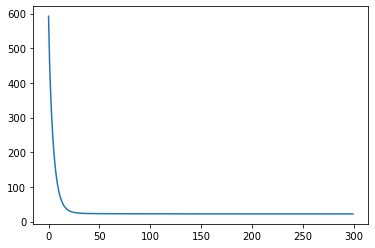

In [10]:
print('theta', theta)

plt.plot(err_list)
plt.show()

In [11]:
# Computing R2 score

def r2_score(y, y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1- num/denom)
    return score*100

score 74.04541323942743
